# Problem 2

The Matrix Equation $Ax = b$ given by 

$$\begin{bmatrix}
1 & 50 \\
0 & 0 \\
\end{bmatrix} * \begin{bmatrix}
x_1  \\
x_2  \\
\end{bmatrix} = \begin{bmatrix}
2  \\
0  \\
\end{bmatrix}$$

In [2]:
A = [ 1. 50; 0 0 ]
b = [2. ; 0]
x = [2/2501 ; 100/2501]
using Test
@test A*x ≈ [2; 0]

Test Passed
  Expression: A * x ≈ [2; 0]
   Evaluated: [2.0, 0.0] ≈ [2, 0]

# Part 1

In [3]:
ϵ = .01

0.01

In [4]:
Aₑ = [1 50; 0 ϵ] 
bₑ = [2; ϵ]
Aₑ \ bₑ

2-element Vector{Float64}:
 -48.0
   1.0

This is $x_e$. It is very different from the solution to the unperturbed problem, $x^{\dagger}$

## Part 2
Let $\epsilon = 0.01$. Compute the SVD

$$A_{\epsilon} = \sigma_1 u_1 v_1^T + \sigma_2 u_2 v_2^T$$

In [23]:
F = svd(Aₑ)
U = F.U
S = F.S
V = F.V
Vt = F.Vt
@test S[1] .* U[:,1] .* Vt[1,:]' + S[2] .* U[:,2] .* Vt[2,:]' ≈ Aₑ
@test U * diagm(S) * V' ≈ Aₑ

1/S[1] * V[:,1] * U[:,1]' * bₑ


2-element Vector{Float64}:
 0.0007996808633858827
 0.039984044768016376

This is basically $A^{\dagger}$. It is very different from $A_e$

## Part 3

In [25]:
λs = 10.0 .^ range(start = -5, stop = 2, length = 100)
function findError(λ)
    Aₗ = [1 50; 0 ϵ ; λ 0 ; 0 λ]
    b̂ = [2; ϵ ; 0 ; 0]
    return norm(Aₑ * (Aₗ \ b̂) - bₑ)
end

es = findError.(λs)

100-element Vector{Float64}:
 2.395010127412144e-5
 3.3136351343527814e-5
 4.582919767662227e-5
 6.335183059988875e-5
 8.751281473024658e-5
 0.00012077157323552391
 0.0001664489710198657
 0.0002289848461381649
 0.00031423321133563966
 0.00042976307977433227
 0.0005850919466277572
 0.0007917143739645155
 0.0010627030343164775
 ⋮
 0.20046791353084356
 0.2671899268596259
 0.3518466291210062
 0.45630867455037694
 0.5808839810290678
 0.7235470963997783
 0.8795437262868895
 1.0417320966304002
 1.2017549133016443
 1.3516887200991523
 1.4855191648640027
 1.5999023676820519

In [27]:
using Plots

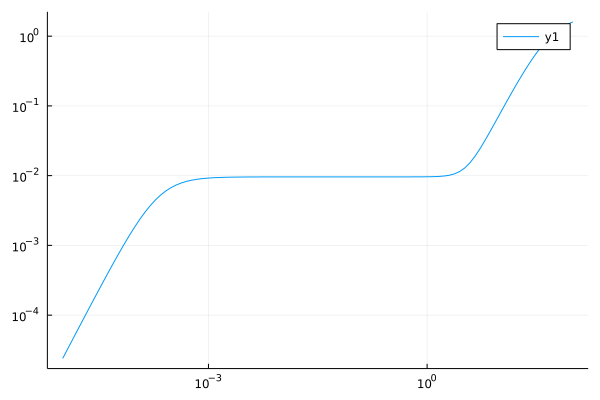

In [28]:
plot(λs, es, xaxis=:log, yaxis=:log)